K-Nearest Neighbours

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
no_shows = pd.read_csv('no_shows_cleaned.csv')

In [5]:
no_shows.head()

,gender,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,62,0,1,0,0,0,0,0
1,M,56,0,0,0,0,0,0,0
2,F,62,0,0,0,0,0,0,0
3,F,8,0,0,0,0,0,0,0
4,F,56,0,1,1,0,0,0,0


In [6]:
# split dataset in two parts: feature set and target label 
feature_set = ['age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received']
features = no_shows[feature_set]
target = no_shows.no_show

# partition data into training and testing set
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = \
train_test_split(features, target, test_size=0.3, random_state=1)

In [7]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier
 
# Create a KNN classifier object
model = KNeighborsClassifier(n_neighbors=33)
 
# Train the model using the training dataset
model.fit(feature_train,target_train)
 
# Predict the target variable for test dataset
predictions = model.predict(feature_test)
 
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.7968688727338542
Precision: 0.43902439024390244
Recall: 0.0026749888542131075
F1-Score: 0.005317577548005908


Confusion Matrix

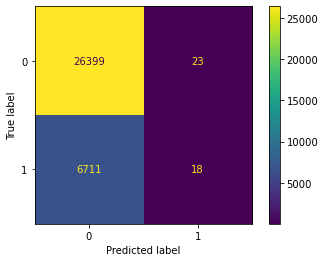

In [8]:
# Import the confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Plot Confusion matrix
plot_confusion_matrix(model, feature_test, target_test, values_format='d')

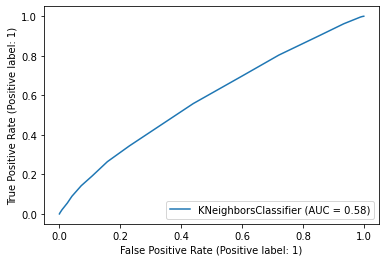

In [9]:
predictions_prob = model.predict_proba(feature_test)[::,1]

# import plot_roc_curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model , feature_test, target_test)

In [10]:
# import ROC AUC score
from sklearn.metrics import roc_auc_score

# Compute the area under ROC curve
auc = roc_auc_score(target_test, predictions_prob)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.5836776426162111


Random Forest Classification

In [11]:
X = no_shows.iloc[:, 1:-1].values
y = no_shows.iloc[:, -1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
print(X_train)

[[66  0  1 ...  0  0  0]
 [80  0  1 ...  0  0  0]
 [50  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  1]
 [41  0  0 ...  0  0  0]
 [50  0  1 ...  0  0  0]]


In [14]:
print(y_train)

[0 0 0 ... 1 0 0]


In [15]:
print(X_test)

[[63  0  0 ...  0  0  1]
 [18  0  0 ...  0  0  0]
 [82  0  0 ...  0  0  0]
 ...
 [25  0  0 ...  0  0  1]
 [51  0  0 ...  0  0  0]
 [39  0  0 ...  0  0  0]]


In [16]:
print(y_test)

[0 0 0 ... 0 0 1]


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
print(X_train)

[[ 1.25007303 -0.3289227   2.00675192 ... -0.17588936 -0.13930454
  -0.68781482]
 [ 1.85569971 -0.3289227   2.00675192 ... -0.17588936 -0.13930454
  -0.68781482]
 [ 0.55792825 -0.3289227  -0.4983177  ... -0.17588936 -0.13930454
  -0.68781482]
 ...
 [-1.60502418 -0.3289227  -0.4983177  ... -0.17588936 -0.13930454
   1.45387969]
 [ 0.16859681 -0.3289227  -0.4983177  ... -0.17588936 -0.13930454
  -0.68781482]
 [ 0.55792825 -0.3289227   2.00675192 ... -0.17588936 -0.13930454
  -0.68781482]]


In [19]:
print(X_test)

[[ 1.12029588 -0.3289227  -0.4983177  ... -0.17588936 -0.13930454
   1.45387969]
 [-0.82636131 -0.3289227  -0.4983177  ... -0.17588936 -0.13930454
  -0.68781482]
 [ 1.94221781 -0.3289227  -0.4983177  ... -0.17588936 -0.13930454
  -0.68781482]
 ...
 [-0.52354797 -0.3289227  -0.4983177  ... -0.17588936 -0.13930454
   1.45387969]
 [ 0.6011873  -0.3289227  -0.4983177  ... -0.17588936 -0.13930454
  -0.68781482]
 [ 0.08207872 -0.3289227  -0.4983177  ... -0.17588936 -0.13930454
  -0.68781482]]


In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [21]:
print(classifier.predict(sc.transform([[30,87000,30,30,30,30,30]])))

[0]


In [22]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 1]]


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[21846   160]
 [ 5553    67]]


0.7932020560341707

K-Means Clustering

In [46]:
X = no_shows.iloc[:, [1, 8]].values

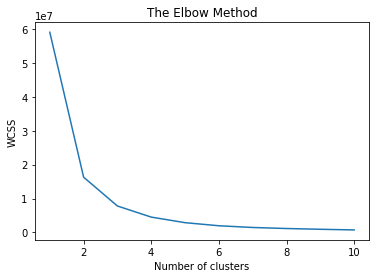

In [47]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [48]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

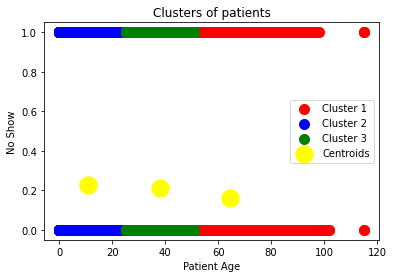

In [49]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of patients')
plt.xlabel('Patient Age')
plt.ylabel('No Show')
plt.legend()
plt.show()